<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Iris_Data_with_and_without_Batch_normlization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [60]:
#Pytorch Libraries
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset

#Sklearn libraries
from sklearn.model_selection import train_test_split

#Numbert crunching
import numpy as np
import scipy.stats as stats

#For dataframe management
import pandas as pd

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')


# Data - Import and process

In [61]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df=pd.read_csv(url,sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


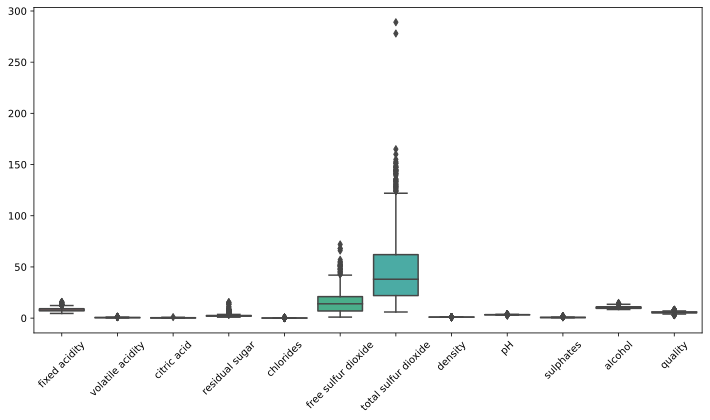

In [62]:
#Outlier detection
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(data=df)

In [63]:
#Outlier removal
df=df[~(df['total sulfur dioxide']>200)]

In [64]:
colzscore=df.columns.drop('quality')
#colzscore
df[colzscore]=df[colzscore].apply(stats.zscore)
df.describe().T

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1597.0,3.559388e-17,1.000313,-2.136087,-0.700608,-0.241254,0.505195,4.352281
volatile acidity,1597.0,1.245786e-16,1.000313,-2.280762,-0.771826,-0.045301,0.625338,5.878672
citric acid,1597.0,1.779694e-17,1.000313,-1.391823,-0.928677,-0.053845,0.769526,3.754246
residual sugar,1597.0,-9.788316e-17,1.000313,-1.169149,-0.452579,-0.237608,0.049020,9.292776
chlorides,1597.0,-1.423755e-16,1.000313,-1.604575,-0.372141,-0.180901,0.052836,11.123495
free sulfur dioxide,1597.0,8.898469e-18,1.000313,-1.422837,-0.847870,-0.177075,0.493721,5.380944
total sulfur dioxide,1597.0,-5.339081e-17,1.000313,-1.262581,-0.759698,-0.256814,0.497510,3.734821
density,1597.0,-8.361001e-14,1.000313,-3.546932,-0.611139,-0.000622,0.578043,3.683719
pH,1597.0,3.025479e-16,1.000313,-3.709380,-0.658744,-0.009673,0.574491,4.533826
sulphates,1597.0,8.898469e-17,1.000313,-1.937318,-0.639221,-0.226190,0.422859,7.916418


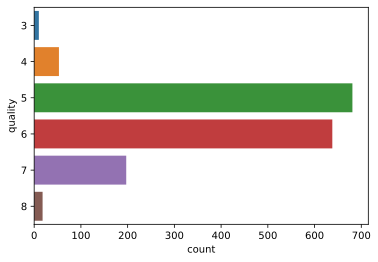

In [65]:
#target distribution
sns.countplot(y=df.quality)

<ipython-input-66-d318f49583fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['boolquality'][df.quality>5]=1


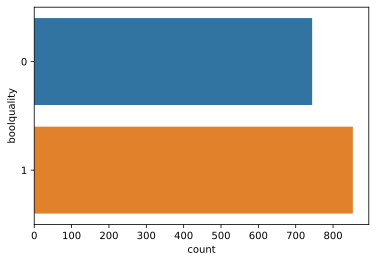

In [66]:
df['boolquality']=0
df['boolquality'][df.quality>5]=1
sns.countplot(y=df.boolquality)

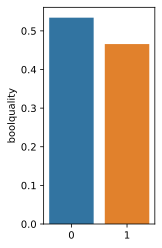

In [67]:
#Target percentage distribution
fig=plt.figure(figsize=(2,4))
#.plot(kind='bar')
sns.barplot(y=df['boolquality'].value_counts(normalize=True),x=df.boolquality.unique());

# Data Split

In [68]:
#Convert the data and labels in tensor
data=torch.tensor(df[colzscore].values).float()
labels=torch.tensor(df['boolquality'].values).float()
labels=labels[:,None]
#labels
#Split the data in train and test data
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.1)

#Convert the data into pytorc datasets
train_data=TensorDataset(train_data,train_label)
test_data=TensorDataset(test_data,test_label)

#convert data & labels in Dataloader
train_loader=DataLoader(train_data,batch_size=32,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])



# Deep Learning Model - Creation adn Training

# Creation-Model  With Batch norm

In [69]:
def createModelwithbn():

  #Model Architechture
  ANNclass=nn.Sequential(
      nn.Linear(11,16),
      nn.Linear(16,32),
      nn.BatchNorm1d(32),
      nn.ReLU(),
      nn.Linear(32,20),
      nn.BatchNorm1d(20),
      nn.ReLU(),      
      nn.Linear(20,1)
  )

  #Loss function
  lossfunc=nn.BCEWithLogitsLoss()
  #Optimizer
  optimizer=torch.optim.SGD(ANNclass.parameters(),lr=.01)

  #return
  return ANNclass,lossfunc,optimizer

# Creat Model without Batch Norm

In [70]:
def createModelwithoutbn():

  #Model Architechture
  ANNclass=nn.Sequential(
      nn.Linear(11,16),
      nn.Linear(16,32),
      #nn.BatchNorm1d(32),
      nn.ReLU(),
      nn.Linear(32,20),
      #nn.BatchNorm1d(20),
      nn.ReLU(),      
      nn.Linear(20,1)
  )

  #Loss function
  lossfunc=nn.BCEWithLogitsLoss()
  #Optimizer
  optimizer=torch.optim.SGD(ANNclass.parameters(),lr=.01)

  #return
  return ANNclass,lossfunc,optimizer

In [71]:
ANNclass

Sequential(
  (0): Linear(in_features=11, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=32, bias=True)
  (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=20, bias=True)
  (5): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Linear(in_features=20, out_features=1, bias=True)
)

# Training

In [72]:
from typing_extensions import Annotated
######Train the model

#No of Epoch
numepochs=1000

def trainModel():

  #initializes loss & Accuracy
  losses=torch.zeros(numepochs)
  trainacc=[]
  testacc=[]

  #Loop for running each epoch

  for epochi in range(numepochs):

    #Initializes Batchloss and Batch accuracy
    batchloss=[]
    batchacc=[]

    # Run each batches
    for X,y in train_loader:

      #Forward pass
      yHat=ANNclass(X)

      #Loss
      loss=lossfunc(yHat,y)

      #backpropos
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #Batch Loss
      batchloss.append(loss.item())
      #Batch accuracy
      batchacc.append(100*torch.mean(((yHat>0)==y).float()))

      #End of batch Loop
    
    #caluclate Train acc
    trainacc.append(np.mean(batchacc))

    #Loss for each epoc
    losses[epochi]=np.mean(batchloss)


    ##test Accuracy
    ANNclass.eval()
    X,y=next(iter(test_loader))
    with torch.no_grad():
      yHat=ANNclass(X)
    testacc.append(100*torch.mean(((yHat>0)==y).float()))

    #End of Epoch Loop

  return trainacc,testacc,losses
    


# Run The Model

In [73]:
#Run Model with Batch Norm
ANNclass,lossfunc,optimizer=createModelwithbn()
trainacc,testacc,losses=trainModel()

#Run Model without Batch norm
ANNclass,lossfunc,optimizer=createModelwithoutbn()
trainacc_nobn,testacc_nobn,losses_nobn=trainModel()



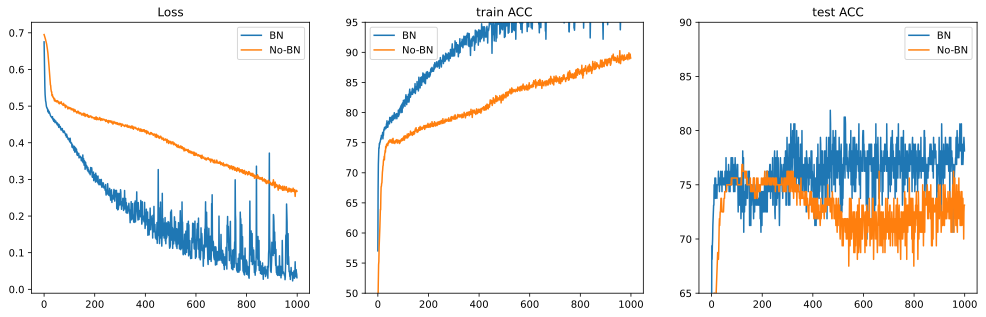

In [80]:
fig,ax=plt.subplots(1,3,figsize=(17,5))

ax[0].plot(losses,label='BN')
ax[0].plot(losses_nobn,label='No-BN')
ax[0].set_title('Loss')
ax[0].legend()


ax[1].plot(trainacc,label='BN')
ax[1].plot(trainacc_nobn,label='No-BN')
ax[1].set_title('train ACC')
ax[1].set_ylim([50,95])
ax[1].legend()



ax[2].plot(testacc,label='BN')
ax[2].plot(testacc_nobn,label='No-BN')
ax[2].set_title('test ACC')
ax[2].set_ylim([65,90])
ax[2].legend()

plt.show();